<span style="font-size:2.0em;">**Notebook for comparing perfromance by varying train_test split and changing the value of K in KNN**</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Processing

In [2]:
data_df = pd.read_csv("data.csv")

In [3]:
data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_df.shape

(42000, 785)

In [5]:
y=data_df['label']
x=data_df.drop('label',axis=1)
type(x)

pandas.core.frame.DataFrame

7


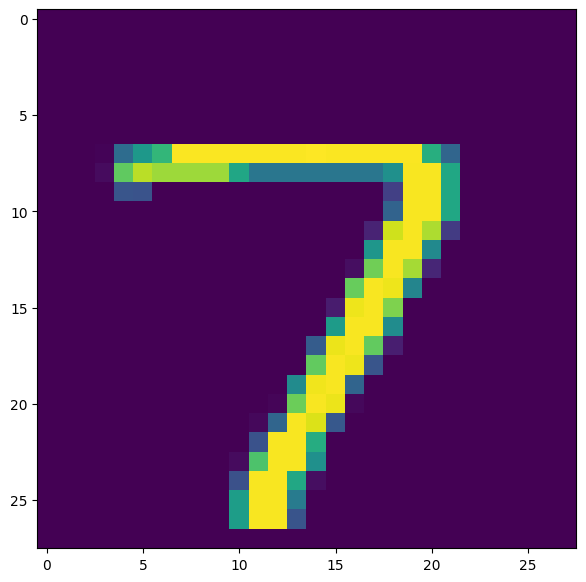

In [6]:
plt.figure(figsize=(7,7))
some_digit=1234
some_digit_image = x.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
print(y[some_digit])

<Axes: xlabel='label', ylabel='count'>

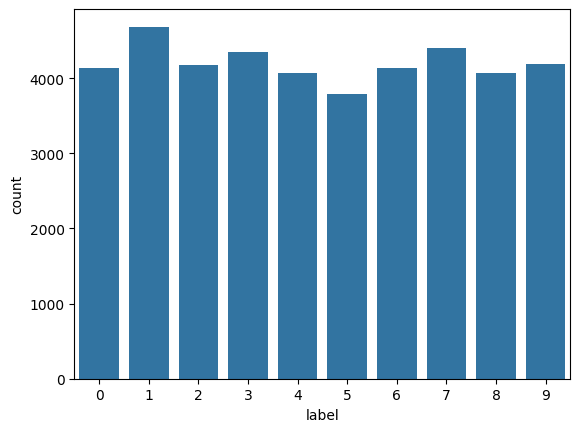

In [7]:
sns.countplot( x='label', data=data_df) 

### Comparing Models

In [8]:
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [9]:
SPLIT_PERCENT = [60,70,75,80,90,95]
K = [2,4,5,6,7,10]

In [10]:
results = {
    "split": [],
    "k": [],
    "precision": [],
    "recall": [],
    "f1-score": [],
    "accuracy": []
}

i=0
j=0
accuaracy=[[]]
for split in SPLIT_PERCENT:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = (100-split)/100, random_state = 40)
    x_train.shape,y_train.shape,x_test.shape,y_test.shape

    for k in K:
        print(f"For test train split of {split}-{100-split} and K={k}")
        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(x_train, y_train)

        y_pred = classifier.predict(x_test)

        report = classification_report(y_test, y_pred, output_dict=True)
        
        # # Extract classification report
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1_score = report['weighted avg']['f1-score']
        accuracy = accuracy_score(y_test, y_pred)

        # Store the results
        results['split'].append(split)
        results['k'].append(k)
        results['precision'].append(precision)
        results['recall'].append(recall)
        results['f1-score'].append(f1_score)
        results['accuracy'].append(accuracy)


        print("\nCofusion Matrix and Performance Report:\n",confusion_matrix(y_test, y_pred))
        print("\n",classification_report(y_test, y_pred))
        print("Accuracy received = ",accuracy_score(y_test, y_pred))
        # print(f"recivied confusion matrix for {split}-{100-split} split and K={k} is\n",confusion_matrix(y_test, y_pred))
        # print(f"precision, recall and f1 score at {split}-{100-split} split and K={k} is\n",classification_report(y_test, y_pred))
        # print(f"accuracy received at train-test split of {split}-{100-split} and K={k} is ",accuracy_score(y_test, y_pred))
        print("\n\n\n")

For test train split of 60-40 and K=2

Cofusion Matrix and Performance Report:
 [[1612    0    2    0    0    1    2    0    0    0]
 [   0 1867    0    0    0    0    0    1    1    2]
 [  12   18 1652    7    2    1    1   15    2    3]
 [   5    7   18 1733    1   19    0    8   10    2]
 [   3   19    1    0 1594    0    5    3    0   17]
 [   7    3    3   54    3 1418   13    0    0    5]
 [  21    1    0    0    3   13 1574    0    0    0]
 [   1   29    8    5    5    0    0 1684    1   19]
 [  13   21   17   53   12   56    5   13 1388   10]
 [   8    8    2   17   66   10    1   66    8 1510]]

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1617
           1       0.95      1.00      0.97      1871
           2       0.97      0.96      0.97      1713
           3       0.93      0.96      0.94      1803
           4       0.95      0.97      0.96      1642
           5       0.93      0.94      0.94      1506
        

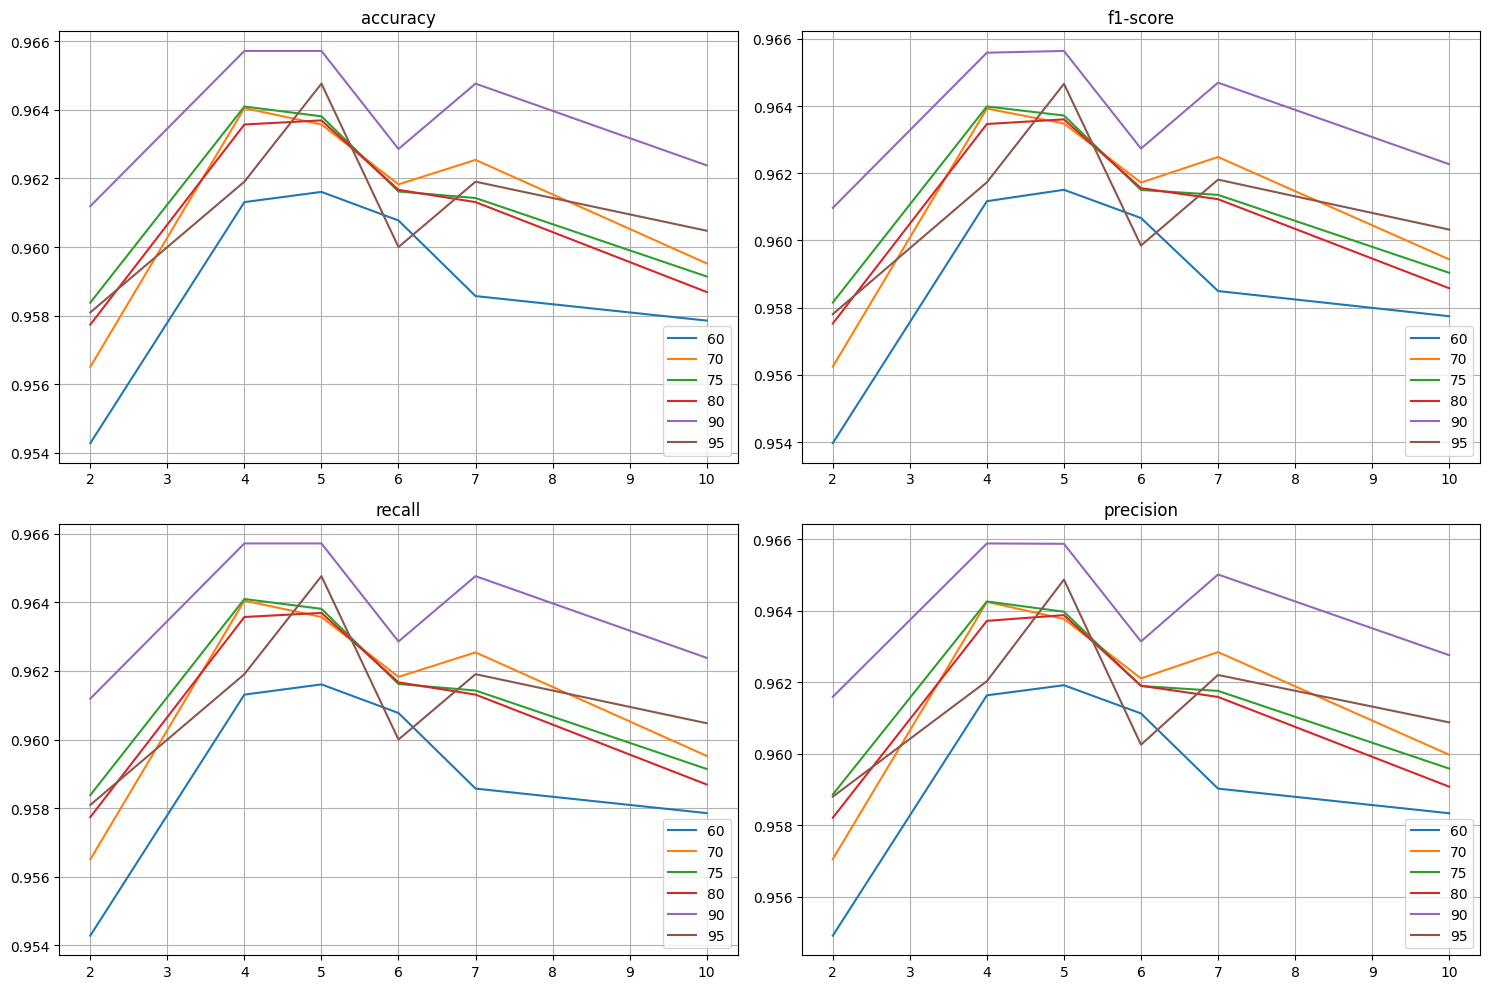

In [11]:
import copy
temp=[60,70,75,80,90,95]
params=['accuracy','f1-score','recall','precision']
results_copy=results.copy()
df=pd.DataFrame(results_copy,index=None)
i=1
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for p in params:
    for k in temp:
        g=df.loc[df['split'] == k]
        plt.subplot(2,2,i)
        plt.plot(g['k'],g[p] , label=k)

    i=i+1
    plt.title(p)
    plt.grid(True)
    plt.legend(loc='best')    
plt.tight_layout()
plt.show()
